In [23]:
# Importación librerías.

import tensorflow as tf
import numpy as np

In [24]:
# Arrays con la enytrada de datos y la salida.

celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [38]:
# Creación de capa y de modelo de tipo secuencial.

#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

#Agregando mas capas y neuronas.
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compilación del modelo.

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [40]:
# Entrenamiento

print("Comenzando entrenamiento")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando entrenamiento
Modelo entrenado


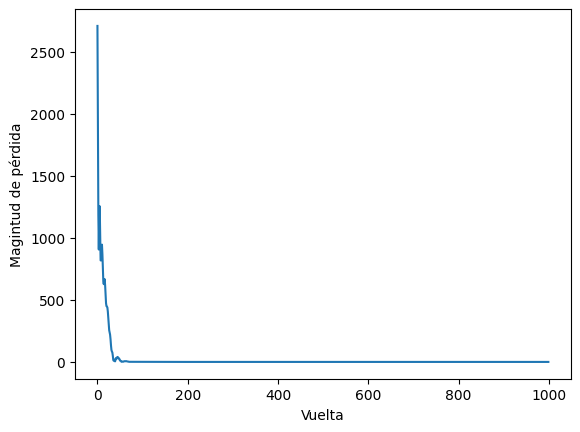

In [41]:
# Resultado de la función de pérdida

import matplotlib.pyplot as plt
plt.xlabel("Vuelta")
plt.ylabel("Magintud de pérdida")
plt.plot(historial.history["loss"])

In [42]:
# Predicción

print("Una predicción")
resultado = modelo.predict(np.array([100.0])) #Hay que convertirlo a array que es lo que el método espera recibir.
print("El reusltado es "+ str(resultado)+" fahrenheit")

Una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
El reusltado es [[211.7476]] fahrenheit


In [43]:
# Para ver los valores que se le han asignado a el peso y al sesgo.
print("Variables internas del modelo")
#print(capa.get_weights())

print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[0.37058428, 0.94338834, 0.4024056 ]], dtype=float32), array([-3.0064054,  3.8233595,  3.7530253], dtype=float32)]
[array([[ 0.19468625,  1.6537203 , -0.2404037 ],
       [-0.04314927, -1.2867965 ,  0.34464   ],
       [-0.41127875, -1.2274258 ,  1.2401354 ]], dtype=float32), array([ 1.3952962, -3.8635297,  3.7487938], dtype=float32)]
[array([[-0.12217022],
       [-1.0568833 ],
       [ 0.84923726]], dtype=float32), array([3.567556], dtype=float32)]
